In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
%cd drive/MyDrive/genrecog/
%pip install speechbrain

In [3]:
from genrecog.preprocess.preprocessor import Preprocessor
from genrecog.nnet.RNN import LSTM
from genrecog.tools.trainer import RNNFbankTrainer
import torch
from torch.utils.data import TensorDataset, DataLoader 
import datetime

torch.manual_seed(0)

In [4]:
# Load dataset

train_preprcessor = Preprocessor('dataset/npz_files/train.npz')
test_preprcessor = Preprocessor('dataset/npz_files/test.npz')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
X, y = train_preprcessor.as_shuffled_torch()
X_test, y_test = test_preprcessor.as_shuffled_torch()

dataset = TensorDataset(X.to(device), y.to(device))
validation_dataset, train_dataset = torch.utils.data.random_split(dataset, (400, 3200))
test_dataset = TensorDataset(X_test.to(device), y_test.to(device))

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=400)
validation_dataloader = DataLoader(validation_dataset, shuffle=True, batch_size=400)
test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=400)

In [6]:
hidden_size = 128
num_layers = 5
input_size = 40
output_dim = 10
time_sequence = 702
lr = 0.001
model = LSTM(
    input_size=input_size, 
    time_sequence=time_sequence,
    hidden_size=hidden_size, 
    num_layers=num_layers, 
    output_dim=output_dim,
    use_mean=False
    ).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model

LSTM(
  (batch_norm_input): BatchNorm1d(702, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm): LSTM(40, 128, num_layers=5, batch_first=True)
  (batch_norm_hidden): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
)

In [7]:
trainer = RNNFbankTrainer(
    model=model, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=100)
trainer.train()

============================== EPOCH 1 =================================
Training accuracy 29.56
Training loss 1.9431
Validation accuracy 7.50
Validation loss 2.3017
============================== EPOCH 2 =================================
Training accuracy 38.87
Training loss 1.7085
Validation accuracy 10.75
Validation loss 2.2748
============================== EPOCH 3 =================================
Training accuracy 41.16
Training loss 1.6377
Validation accuracy 21.50
Validation loss 2.2133
============================== EPOCH 4 =================================
Training accuracy 43.50
Training loss 1.5905
Validation accuracy 29.00
Validation loss 2.1419
============================== EPOCH 5 =================================
Training accuracy 45.66
Training loss 1.5467
Validation accuracy 40.25
Validation loss 2.0452
============================== EPOCH 6 =================================
Training accuracy 46.25
Training loss 1.5013
Validation accuracy 43.00
Validation loss 1.8888

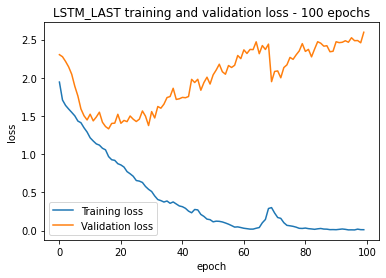

In [8]:
trainer.plot_loss("LSTM_LAST training and validation loss - 100 epochs")

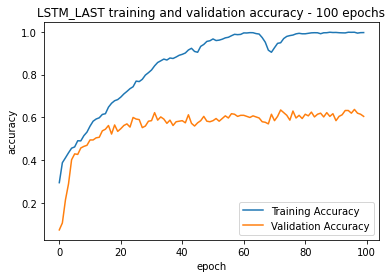

In [9]:
trainer.plot_accuracies("LSTM_LAST training and validation accuracy - 100 epochs")

In [10]:
trainer.eval(test_dataloader)

(tensor([0, 0, 2, 0, 2, 5, 7, 6, 3, 5, 9, 5, 7, 1, 7, 2, 9, 9, 7, 5, 9, 9, 6, 6,
         4, 8, 7, 2, 4, 5, 3, 8, 2, 5, 1, 0, 4, 7, 4, 7, 1, 3, 6, 7, 1, 7, 3, 7,
         4, 5, 7, 9, 7, 7, 5, 7, 7, 0, 7, 5, 3, 2, 0, 9, 9, 4, 3, 8, 8, 0, 5, 4,
         3, 6, 1, 6, 6, 3, 7, 9, 9, 5, 3, 7, 1, 6, 2, 4, 2, 0, 2, 4, 6, 5, 4, 2,
         9, 2, 9, 4, 7, 3, 2, 5, 7, 7, 1, 2, 3, 3, 2, 1, 9, 8, 5, 1, 9, 1, 1, 2,
         9, 2, 3, 8, 7, 9, 2, 8, 3, 7, 2, 3, 2, 5, 4, 5, 1, 1, 9, 6, 6, 8, 7, 1,
         6, 1, 1, 3, 5, 7, 9, 2, 7, 2, 9, 2, 6, 2, 5, 4, 4, 7, 7, 1, 9, 3, 4, 0,
         8, 8, 1, 5, 6, 3, 4, 4, 1, 3, 2, 8, 7, 5, 0, 8, 4, 7, 1, 4, 4, 8, 4, 9,
         8, 6, 5, 9, 3, 8, 2, 5, 7, 3, 9, 9, 1, 7, 0, 4, 7, 1, 2, 7, 4, 7, 7, 5,
         9, 8, 5, 2, 2, 3, 6, 8, 5, 5, 1, 3, 0, 4, 3, 0, 7, 5, 3, 0, 4, 2, 4, 8,
         2, 6, 7, 3, 9, 7, 5, 5, 3, 3, 0, 5, 9, 3, 2, 7, 5, 5, 7, 2, 2, 4, 4, 9,
         0, 8, 2, 1, 2, 3, 4, 8, 7, 5, 3, 0, 2, 7, 9, 5, 5, 7, 2, 6, 5, 1, 6, 5,
         7, 5, 9, 9, 9, 1, 1

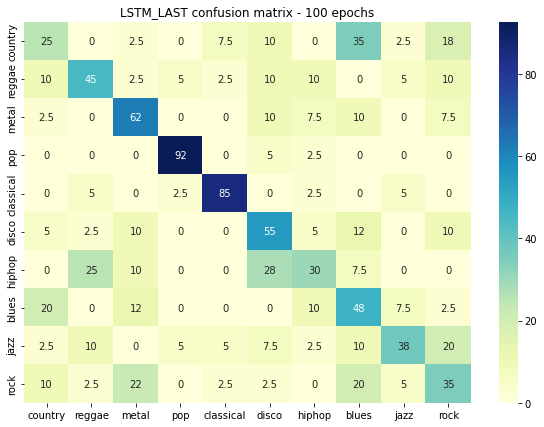

In [11]:
trainer.plot_confusion_matrix(test_dataloader, "LSTM_LAST confusion matrix - 100 epochs")

In [12]:
trainer.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.33      0.25      0.29        40
      reggae       0.50      0.45      0.47        40
       metal       0.51      0.62      0.56        40
         pop       0.88      0.93      0.90        40
   classical       0.83      0.85      0.84        40
       disco       0.43      0.55      0.48        40
      hiphop       0.43      0.30      0.35        40
       blues       0.33      0.47      0.39        40
        jazz       0.60      0.38      0.46        40
        rock       0.34      0.35      0.35        40

    accuracy                           0.52       400
   macro avg       0.52      0.51      0.51       400
weighted avg       0.52      0.52      0.51       400



In [20]:
hidden_size = 128
num_layers = 5
input_size = 40
output_dim = 10
time_sequence = 702
lr = 0.001
model_2 = LSTM(
    input_size=input_size, 
    time_sequence=time_sequence,
    hidden_size=hidden_size, 
    num_layers=num_layers, 
    output_dim=output_dim,
    use_mean=False
    ).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=lr)
model_2

LSTM(
  (batch_norm_input): BatchNorm1d(702, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm): LSTM(40, 128, num_layers=5, batch_first=True)
  (batch_norm_hidden): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
)

In [21]:
trainer_2 = RNNFbankTrainer(
    model=model_2, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=30)
trainer_2.train()

============================== EPOCH 1 =================================
Training accuracy 29.00
Training loss 1.9682
Validation accuracy 11.00
Validation loss 2.2959
============================== EPOCH 2 =================================
Training accuracy 37.75
Training loss 1.7218
Validation accuracy 19.50
Validation loss 2.2671
============================== EPOCH 3 =================================
Training accuracy 41.12
Training loss 1.6332
Validation accuracy 23.25
Validation loss 2.2373
============================== EPOCH 4 =================================
Training accuracy 43.72
Training loss 1.5736
Validation accuracy 32.00
Validation loss 2.1866
============================== EPOCH 5 =================================
Training accuracy 45.56
Training loss 1.5245
Validation accuracy 36.50
Validation loss 2.1210
============================== EPOCH 6 =================================
Training accuracy 47.00
Training loss 1.4860
Validation accuracy 43.25
Validation loss 2.033

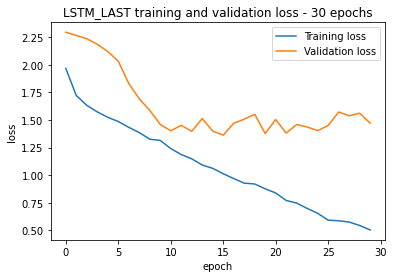

In [22]:
trainer_2.plot_loss("LSTM_LAST training and validation loss - 30 epochs")

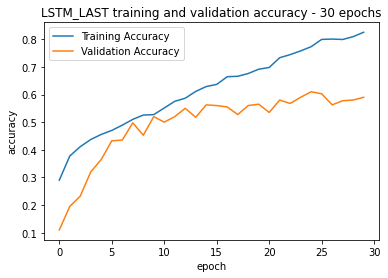

In [23]:
trainer_2.plot_accuracies("LSTM_LAST training and validation accuracy - 30 epochs")

In [24]:
trainer_2.eval(test_dataloader)

(tensor([3, 6, 4, 7, 5, 9, 2, 4, 4, 4, 7, 4, 5, 8, 2, 5, 6, 5, 2, 1, 7, 7, 7, 7,
         4, 3, 7, 5, 5, 8, 1, 1, 4, 0, 5, 5, 3, 5, 6, 9, 1, 2, 5, 2, 5, 6, 9, 5,
         5, 5, 5, 7, 9, 5, 7, 7, 9, 5, 5, 2, 4, 7, 0, 0, 0, 8, 1, 5, 3, 4, 4, 8,
         1, 4, 6, 0, 2, 9, 5, 3, 9, 8, 4, 0, 2, 2, 4, 5, 7, 7, 9, 9, 5, 4, 3, 9,
         7, 2, 3, 9, 2, 4, 7, 0, 8, 3, 9, 3, 8, 8, 0, 5, 2, 7, 0, 2, 5, 4, 2, 1,
         0, 1, 9, 5, 1, 5, 9, 9, 0, 6, 9, 3, 8, 2, 2, 6, 3, 2, 9, 2, 2, 4, 3, 7,
         5, 9, 3, 2, 9, 9, 5, 0, 2, 2, 7, 7, 4, 2, 5, 6, 5, 3, 3, 5, 4, 7, 4, 6,
         2, 5, 2, 9, 6, 9, 0, 7, 2, 3, 4, 8, 2, 1, 2, 2, 5, 1, 5, 1, 4, 3, 7, 5,
         4, 3, 6, 9, 7, 9, 2, 9, 2, 9, 3, 5, 2, 0, 1, 3, 2, 4, 6, 8, 2, 6, 8, 5,
         4, 2, 1, 2, 8, 7, 8, 2, 5, 3, 9, 9, 4, 5, 9, 5, 2, 2, 6, 6, 2, 8, 6, 5,
         2, 3, 7, 7, 3, 5, 5, 2, 2, 5, 7, 5, 5, 1, 0, 3, 9, 2, 1, 2, 6, 9, 7, 6,
         4, 6, 3, 2, 9, 9, 5, 3, 5, 9, 7, 9, 5, 6, 1, 5, 2, 5, 8, 3, 5, 7, 7, 8,
         4, 9, 6, 1, 9, 7, 5

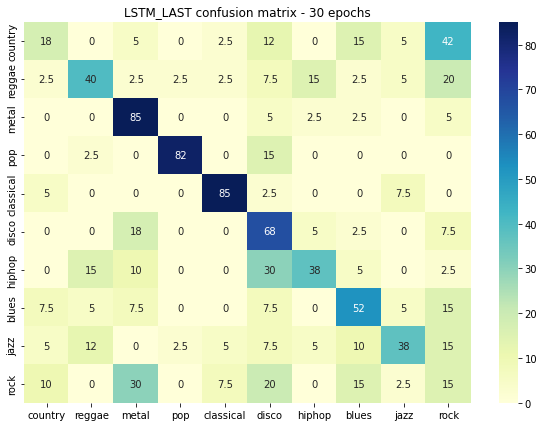

In [27]:
trainer_2.plot_confusion_matrix(test_dataloader, "LSTM_LAST confusion matrix - 30 epochs")

In [26]:
trainer_2.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.37      0.17      0.24        40
      reggae       0.53      0.40      0.46        40
       metal       0.54      0.85      0.66        40
         pop       0.94      0.82      0.88        40
   classical       0.83      0.85      0.84        40
       disco       0.39      0.68      0.49        40
      hiphop       0.58      0.38      0.45        40
       blues       0.50      0.53      0.51        40
        jazz       0.60      0.38      0.46        40
        rock       0.12      0.15      0.13        40

    accuracy                           0.52       400
   macro avg       0.54      0.52      0.51       400
weighted avg       0.54      0.52      0.51       400

